Algoritmos Genéticos y Optimización Heurística - UTN-FRT
# **Trabajo Práctico N°5**
##**Tema**: Aplicaciones de AG##

Objetivo: Aplicar heurísticas a problemas reales.

## Ejercicio 1

Utilice el AG Simple para resolver el problema del viajante o TSP (Travelling Salesman Problem):
* Se tienen **N** ciudades por las cuales el viajante debe pasar.
* El viajante pasa sólo una vez por cada ciudad.
* Inicia en una ciudad, hace su recorrido y vuelve a la ciudad de inicio.
* El objetivo es encontrar el camino más corto que el viajante debe recorrer para pasar por todas las ciudades.

El caso particular que usted debe resolver consiste de 14 ciudades, cuyas coordenadas son las siguientes (tomar la primera como punto de partida):

Ciudades para el problema de TSP


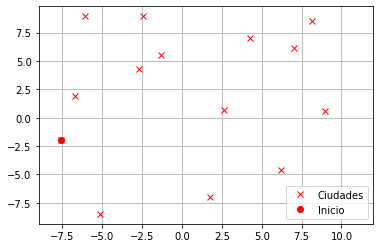

In [ ]:
coordenadas = [
  [-7.5984,-1.9725],
  [-6.7323, 1.8807],
  [-2.7165, 4.2661],
  [-1.2992, 5.5505],
  [-6.1024, 8.9450],
  [-2.4803, 8.9450],
  [ 4.2913, 7.0183],
  [ 7.0472, 6.1009],
  [ 8.1496, 8.4862],
  [ 8.9370, 0.5963],
  [ 2.6378, 0.6881],
  [ 6.1811,-4.6330],
  [ 1.7717,-7.0183],
  [-5.1575,-8.4862]
]

x = [c[0] for c in coordenadas]
y = [c[1] for c in coordenadas]
import matplotlib.pyplot as plt
plt.plot(x, y, 'xr', label='Ciudades');
plt.plot(x[0], y[0], 'or', label='Inicio');
plt.legend()
plt.grid()
plt.xlim([-9,12])
print("Ciudades para el problema de TSP")

El algoritmo requiere conocer las distancias entre las ciudades para poder calcular la distancia total recorrida. Para ello se propone la siguiente funcion para calcular la distancia entre una ciudad *i* y *j*:

In [ ]:
import math
def distancia(coord_i, coord_j):
  #distancia Euclidea
  return math.sqrt((coord_i[0]-coord_j[0])**2 + (coord_i[1]-coord_j[1])**2)

#ejemplo
ciudad_i = 1
ciudad_j = 5
d = distancia(coordenadas[ciudad_i], coordenadas[ciudad_j])
print("Distancia entre ciudad %d y %d; %f"%(ciudad_i, ciudad_j, d))

Distancia entre ciudad 1 y 5; 8.245231


Se pide:
1. Determinar una codificación adecuada (forma de representar las soluciones  para el problema).
2. Definir las restricciones para los valores en la solución (determinar la matriz de *Bounds*).
3. En base a la codificación elegida, definir una función *Fitness* que permita encontrar buenas soluciones en base al objetivo del problema.
4. Determinar una arquitectura de algoritmos genéticos adecuada para resolver el problema:
  * Definir que tipo de algoritmo genético utilizar.
  * Elegir los operadores genéticos a utilizar.
5. Ajustar los parámetros adecuadamentes usando los criterios utilizados en los prácticos anteriores. La cantidad de generaciones y tamaño de la población pueden variar al tomar diferentes cantidades de ciudades.

In [ ]:
# Operadores adicionales

def mut_swap(p, Bounds, n=1):
    m = p.copy()
    #genero permutacion al azar para elegir coordenadas distintas al azar
    r = list(range(len(m)-1))  #r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    o = r[:n]
    #indices de coordenadas destino
    d = r[n:2*n]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
        m[d[i]] = p[o[i]]
    return m

def mut_adjoin_swap(p, Bounds, n=1):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir coordenadas distintas al azar
    r = list(range(len(m)-1))  #r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    o = r[:n]
    #indices de coordenadas destino
    d = [(x + 1) for x in o]  #d = [(x + 1) % len(m) for x in o]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
        m[d[i]] = p[o[i]]
    return m

def mut_inversion(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[o[-i-1]]
    return m

def mut_shift_left(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #indices de coordenadas destino
    d = [x + 1 for x in o]  #d = [(x + 1) % len(m) for x in o]
    d[-1] = o[0]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
    return m

def mut_shift_right(p, Bounds):
    #copio el padre
    m = p.copy()
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(len(m)))
    random.shuffle(r)
    #indices de coordenadas origen
    #o = [x % len(m) for x in range(r[0], r[1] + (len(m) if r[1] < r[0] else 0))]
    o = [x for x in range(min(r[:2]), max(r[:2]))]
    #indices de coordenadas destino
    d = [x - 1 for x in o]  #d = [(x - 1) % len(m) for x in o]
    d[0] = o[-1]
    #asigno nuevos valores a las coordenadas del mutado
    for i in range(len(o)):
        m[o[i]] = p[d[i]]
    return m

def xov_partial_map(p1, p2):
    c1 = p1.copy()
    c2 = p2.copy()
    n = len(c1);
    #genero permutacion al azar para elegir dos puntos de corte distintos
    r = list(range(n))
    random.shuffle(r)
    #creo la mascara
    mask = [0]*n
    for i in range(min(r[:2]), max(r[:2])):
        mask[i] = 1
    #tacho valores que estan en p1 y p2
    m1 = [1]*n
    m2 = [1]*n
    for i in range(n):
        if not mask[i]:
            for j in range(n):
                if p1[i] == p2[j]:
                    m1[j] = 0
                if p2[i] == p1[j]:
                    m2[j] = 0
    j = k = 0
    #pongo calores no tachados en c1 y c2
    for i in range(n):
        if mask[i]:
            while m1[j] == 0:
                j += 1
            while m2[k] == 0:
                k += 1
            c1[i] = p2[j]
            c2[i] = p1[k]
            j += 1
            k += 1
    return c1, c2

def xov_order_based(p1, p2):
    c1 = p1.copy()
    c2 = p2.copy()
    n = len(c1)
    #crear mascara al azar
    mask = [random.randint(0,1) for i in range(n)]
    #tacho valores que estan en p1 y p2
    m1 = [1]*n
    m2 = [1]*n
    for i in range(n):
        if not mask[i]:
            for j in range(n):
                if p1[i] == p2[j]:
                    m1[j] = 0
                if p2[i] == p1[j]:
                    m2[j] = 0
    j = k = 0
    #pongo calores no tachados en c1 y c2
    for i in range(n):
        if mask[i]:
            while m1[j] == 0:
                j += 1
            while m2[k] == 0:
                k += 1
            c1[i] = p2[j]
            c2[i] = p1[k]
            j += 1
            k += 1
    return c1, c2

In [ ]:
#[c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12 c13, c14, c1] cada individuo tiene las 15 ciudades por las que tiene que pasar
# se puede poner que arranque y termine en 1, y a todas las demas de una forma aleatoria, sin repetir.
#fitness podria ser
#por ej
#distancia_tot = 0
#for i in range(len(individuo):
#   distancia_tot += distancia(ciudad[individuo[i]-1], ciudad[individuo[i+1]]-1)
#return distancia

## Ejercicio 2

Se tiene una red de distribución eléctrica como la de la Figura, compuesta por un transformador trifásico que alimenta a N=20 clientes monofásicos. Un cliente solo puede estar conectado a una fase.

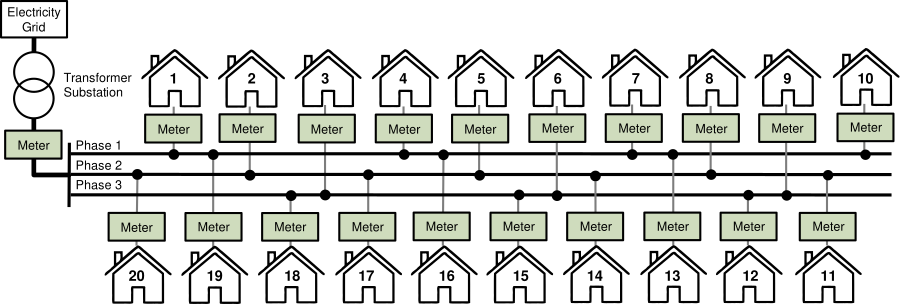








Cada cliente cuenta con un medidor inteligente que registra cuánta energía ha consumido durante un mes. Los valores de consumo son los siguentes:




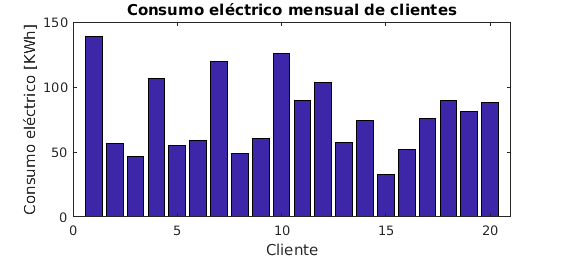




La energía total registrada en la fase "i" del transformador puede ser calculada sumando la energía consumida por todos los clientes conectados a dicha fase. Los consumos por fase son:




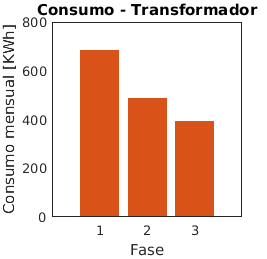




Debido a que existe una gran diferencia de consumo entre las fases, pueden ocurrir pérdidas de energía y se reduce la calidad del servicio eléctrico, entre otros inconvenientes.

Se pide resolver el problema de balance de carga, el cual consiste en equilibrar el valor del consumo eléctrico en cada una de las fases. Para lograrlo se pude cambiar de fase a algunos clientes. Dicho en otras palabras, se pide encontrar un nuevo esquema de conexión, de manera tal que el consumo total en cada fase sea aproximadamente el mismo.

Resuelva las siguientes dos variantes del problema:
1.  Teniendo en cuenta sólo reducir el desbalance de cargas en el transformador.
2.  Teniendo en cuenta reducir el desbalance con la mínima cantidad de cambios de fase.

Se pide:
*   Determine qué codificación utilizará para el problema (cómo representará las soluciones).
*   Diseñe una función de evaluación.
*   Seleccione los operadores genéticos adecuados para el problema.
*   Utilice un AG simple para encontrar una solución al problema.



In [ ]:
#lista con valores de consumo para cada cliente.
consumos_iniciales = [138.49, 56.85, 46.56, 106.58, 54.62, 58.88, 119.36, 49.01, 60.48, 126.07, 89.31, 103.11, 57.18, 74.37, 32.46, 52.30, 75.53, 89.57, 81.36, 88.20]

#lista con valor de la fase donde se conecta el cliente.
fases_iniciales = [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2]

def consumo_fases(consumos_clientes, fases_clientes):
    # Calcular el consumo total por fase a partir del consumo de clientes.
    # Parametros
    # - consumos_clientes: lista con valores de consumo para cada cliente.
    # - fases_clientes: lista con valor de la fase donde se conecta el cliente (valores 1,2 o 3).
    # - Devuelve vector con 3 elementos.

    consumos_fases = [0, 0, 0]
    for i, c in enumerate(consumos_clientes):
        consumos_fases[fases_clientes[i]-1] += c
    return consumos_fases


def indice_desbalance(consumo_fases):
    # Calcula el indice para medir el desbalance de las fases (más alto, más desbalanceado)

    return (max(consumo_fases) / (sum(consumo_fases)/3) - 1) * 100


def fitness_balance_carga(solucion):

    #### COMPLETAR ####
    # llamando a "consumo_fases"
    # llamando a "indice_desbalance"
    # fitness = ...
    ####

    return ...

